
# Project:  Investigate Why do people not attend appointments?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset contains records about the patients medical appointments. it is consist of A number of attributes that form each patient record. the attributes are: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay,Age	Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.
the dataset will be cleaned using differnt librabies in order to be ready to visulaized and to get insights.

This report will answer the following questions:

What the age that most of the appointments come from? 
Does Gender affects the frequency of appointments booked?
Do most of the patients adhere to their appointments?
Does the patients who receive the messages are more adhere to their appointment?
Does the age group affects punctuality?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
To load the data and take A look for it

In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
df.shape

(110527, 14)

the dataset contains 110527 records and 14 columns.

In [5]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#The PatientId and AppointmentID are unique identifiers for each patient
#The average age of patients is 37 years
#The value of Scholarship, Hipertension, Diabetes,Alcoholism, and SMS_received attributs are 0 or 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#there are no missing values, so we don't need to fill any cell. 
#we need to convert the type of ScheduledDay and AppointmentDay columns into datetime.(in the cleaning section)

In [7]:
sum(df.duplicated())

0

#there are no duplicate records so we dont need to drop any records

### Data Cleaning (Change the type, Drop unwanted attributes, and devide into bins )

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [9]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [11]:
df.drop(["PatientId","AppointmentID"], axis=1, inplace=True)

In [12]:
df.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [84]:
bins= [0,20,39,46,56,66,76,86,130]
labels = ['<20','20-38','39-45','46-55','56-65','66-75','76-85','>85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup']).count()

Gender  ScheduledDay  AppointmentDay    Age  Neighbourhood  \
AgeGroup                                                               
<20        30411         30411           30411  30411          30411   
20-38      27334         27334           27334  27334          27334   
39-45       9840          9840            9840   9840           9840   
46-55      15437         15437           15437  15437          15437   
56-65      14203         14203           14203  14203          14203   
66-75       7909          7909            7909   7909           7909   
76-85       4232          4232            4232   4232           4232   
>85         1160          1160            1160   1160           1160   

          Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
AgeGroup                                                             
<20             30411         30411     30411       30411    30411   
20-38           27334         27334     27334       27334    27334   
39-45            9840          9840      9840        9840     9840   
46-55           15437         15437     15437       15437    15437   
56-65           14203         14203     14203       14203    14203   
66-75            7909          7909      7909        7909     7909   
76-85            4232          4232      4232        4232     4232   
>85              1160          1160      1160        1160     1160   

          SMS_received  No-show  
AgeGroup                         
<20              30411    30411  
20-38            27334    27334  
39-45             9840     9840  
46-55            15437    15437  
56-65            14203    14203  
66-75             7909     7909  
76-85             4232     4232  
>85               1160     1160

#Devide age into bins to be better visualized

In [13]:
df.hist(figsize=(20,15));

#just to give a quick view of the attributes to further get insights from some of them

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What the age that most of the appointments come from? )

In [14]:
hist_plot= df['Age'].hist(bins=5)
hist_plot.set_title('Number Of Appointments By Age')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Appointment Frequency')


Text(0, 0.5, 'Appointment Frequency')

The plot relfects an increase in the Appointment's Frequency with the decreas in age (an inverse relationship) ,furthermore it indicate that the most of the appointments are booked by people under the age of 20. 

### Research Question 2  (Does Gender affects the frequency of appointments booked?)

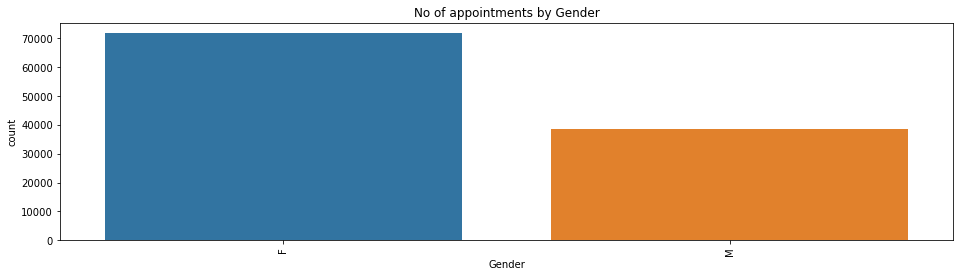

In [17]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Gender)
ax.set_title("No of appointments by Gender")
plt.show()

The above graph clearly shows that most appointments are made by females, which constitute approximately 60% of the total number of appointments. This may be because females need more periodic appointments than men, or because of medical appointments for pregnancy and others.

### Research Question 3  (Do most of the patients adhere to their appointments?)

In [40]:
def pie_chart_function():
    df['No-show'][:]
    show_count=df['No-show'].value_counts()
    show_count.plot(kind='pie')

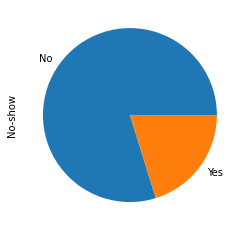

In [41]:
pie_chart_function()

Missed appointments represent less than a quarter of all appointments made. this indicate that the majority of of people adhere to their appointments.

#### Research Question 4  (Does the patients who receive the messages are more adhere to their appointment?)

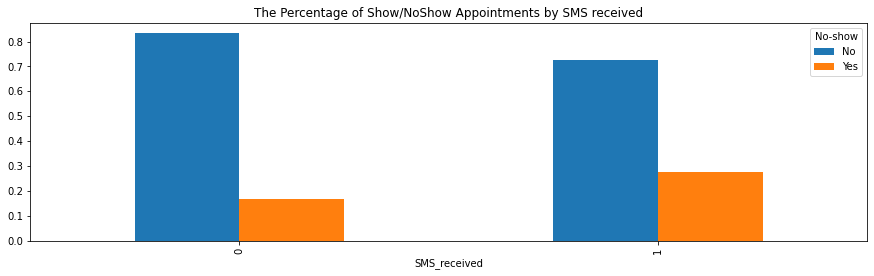

In [65]:
SMS = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,4))
SMS.set_title("The Percentage of Show/NoShow Appointments by SMS received")
plt.show()

0 means the patient does not receive any SMS while 1 means the patient have receive it. the above graph indicates that more than 30% of patient who have receive the SMS messages does not show for their appointments! while in the other hand, only less than 20% of patients who does not receive any messages have miss their appointments. This is surprising because the messages serve as a reminder to patients!

##### Research Question 5  (Does the Age Group affects punctuality?)

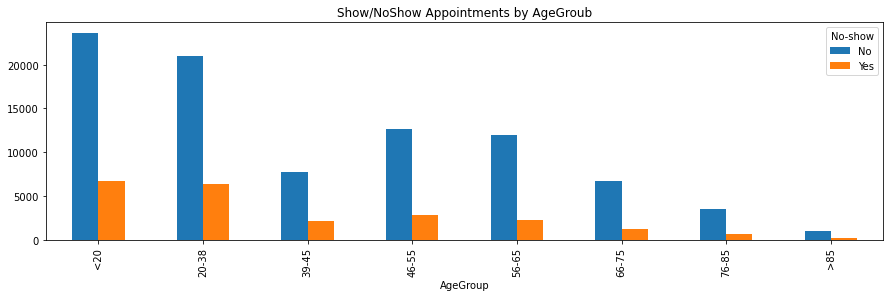

In [97]:
age = df.groupby('AgeGroup')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(15,4))
age.set_title("Show/NoShow Appointments by AgeGroub")
plt.show()

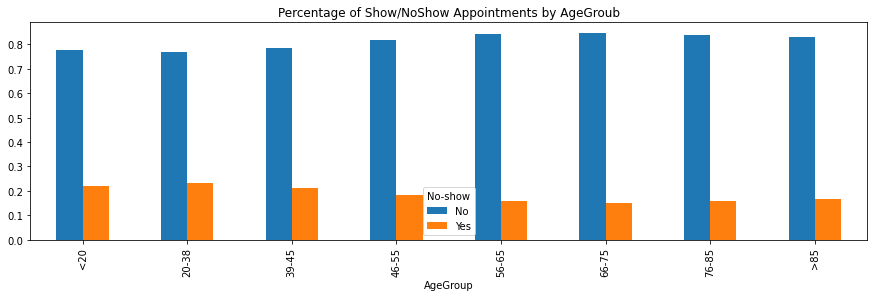

In [96]:
age = df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,4))
age.set_title("Percentage of Show/NoShow Appointments by AgeGroub")
plt.show()

The above graphs show that most of the appointments are booked by people under the age of 20 furthermore, the age group (20-38) have the largest percentage of missed appointments. and generally, people above the age of 45 tend to be more committed to their appointments.

<a id='conclusions'></a>
## Conclusions

The dataset is about the patients medical appointments. that is shaped by 14 differnt record.this report present the relationship between the most intrsting attributes with the focus on the frequincy of appointments made.to get the insights a pie chart and histograms have been used, and it indicate that there is an inverse relationship between age and frequenicy of appointments made and people above the age of 45 tend to be more committed to their appointments. furthermore, the study show that most of the appointments are made by females and this might be resulted from nature of females needs. moreover, the visualization clearly indicate that most of people tend to adhere to thier medical appointments and the patients who have receive a reminding  SMS messages tend to not show to their appointments more than those  who does not receive any messages!

some limitation faced during this project is to find what the kinds of plots are best suited the data I have. Especially for 2d.I have tried the scatter plot and the line plot but unfortunately, they did not provide any interesting or even clear insights.

For future work,  i think gathering more data about nature and type of appointments will be more benifical and it will add to the insights. from these data we can see what the type of appointmens people tend to miss and linked it to some Psychological factors. as some people tend to miss thier dental appointments because they feel nervus and scared and so on . furthermore, we can indicate which type of appointments people cosider it less important.
